In [11]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [12]:
wine = load_wine()
X_train,X_test,y_train,y_test = train_test_split(wine.data,wine.target,random_state=41)

In [13]:
# 決定木の適用
tree = DecisionTreeClassifier(max_depth=None,criterion='gini',random_state=41)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=41)

In [14]:
# Accuracyの表示
print(f'Train Accuracy:{tree.score(X_train,y_train):.3f}')
print(f'Test Accuracy:{tree.score(X_test,y_test):.3f}')

Train Accuracy:1.000
Test Accuracy:0.911


# 決定木の可視化

In [19]:
import graphviz
from sklearn.tree import export_graphviz

In [22]:
dot_data = export_graphviz(tree, out_file='decision_tree.dot',impurity=False,filled=True,
                          feature_names=wine.feature_names,
                          class_names=wine.target_names)

In [21]:
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [23]:
# 決定木の適用　木の深さ＝３，分割基準をジニ不純度に設定
tree = DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=41)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=41)

In [24]:
print(f'Train accuracy:{tree.score(X_train,y_train):.3f}')
print(f'Test accuracy:{tree.score(X_test,y_test):.3f}')

Train accuracy:0.992
Test accuracy:0.933


# 特徴量の重要度評価

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

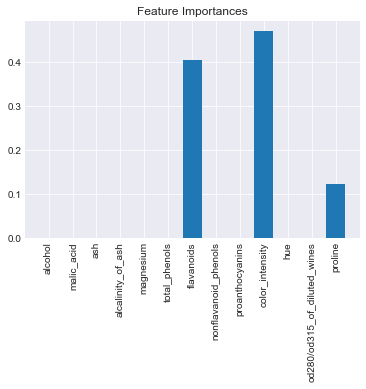

In [26]:
n_features = wine.data.shape[1]
plt.title('Feature Importances')
plt.bar(range(n_features),tree.feature_importances_,align='center')
plt.xticks(range(n_features),wine.feature_names,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.show()